# Data Summary and Visualizations

In [67]:
library(tidyverse)
url <- "https://raw.githubusercontent.com/Xela-debug/datasets/main/Housing.csv"
housing_df <- read_csv(url)

Rows: 545 Columns: 13
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (7): mainroad, guestroom, basement, hotwaterheating, airconditioning, pr...
dbl (6): price, area, bedrooms, bathrooms, stories, parking

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


## Viewing the Mean Price Depending on the Number of Bedrooms

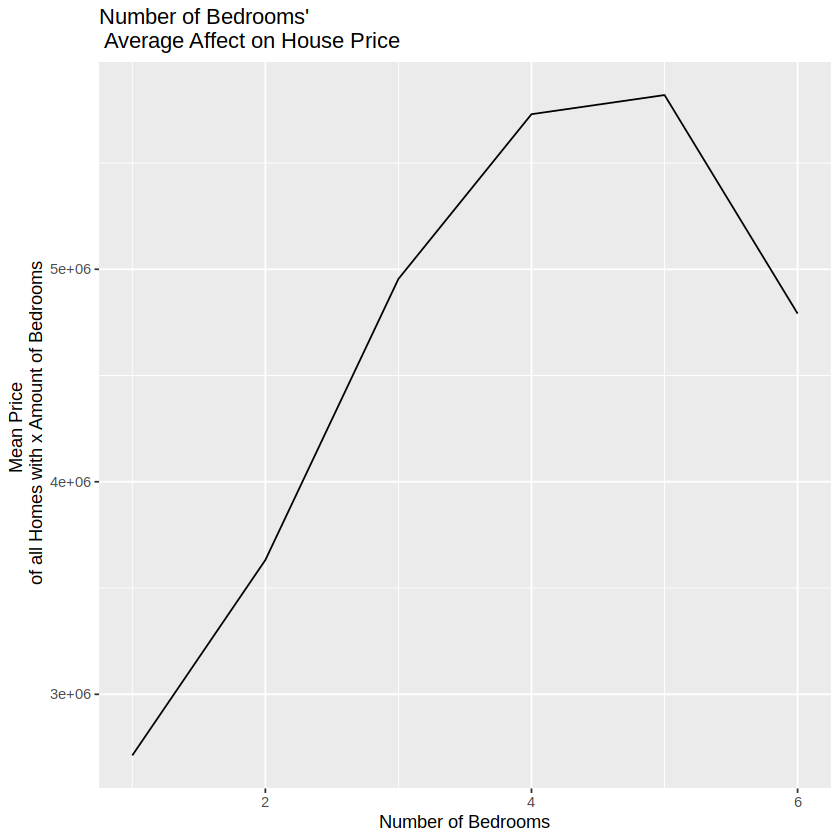

In [5]:
mean_housing_df <- housing_df |>
    group_by(bedrooms) |>
    mutate(mean_price_per_bedroom = mean(price))

housing_plot <- mean_housing_df |>
    ggplot(aes(x = bedrooms, y = mean_price_per_bedroom)) +
        geom_line() +
        labs(title = "Number of Bedrooms'\n Average Affect on House Price", x = "Number of Bedrooms", y = "Mean Price \n of all Homes with x Amount of Bedrooms")
housing_plot

### Pattern
In general, it seems that the number of bedrooms generally correlates with a higher priced home. So there is a strong relationship.  However, oddly enough it drops off after 5 bedrooms for an unknown reason.  This may be something we need to look into within our analysis

## Figuring out What Plays a Big Role in the Price other than Area

[1] 6678000     NaN 7682500 4651500 6090000     NaN 5212846 2537500 5766056
[10] 4571000 5048107 3777594 6285239

[1] "MGBH" "GBH"  "MBH"  "BH"   "MGH"  "GH"   "MH"   "H"    "MGB"  "GB"  
[11] "MB"   "B"    "MG"

Warning message:
“Removed 2 rows containing missing values (`position_stack()`).”


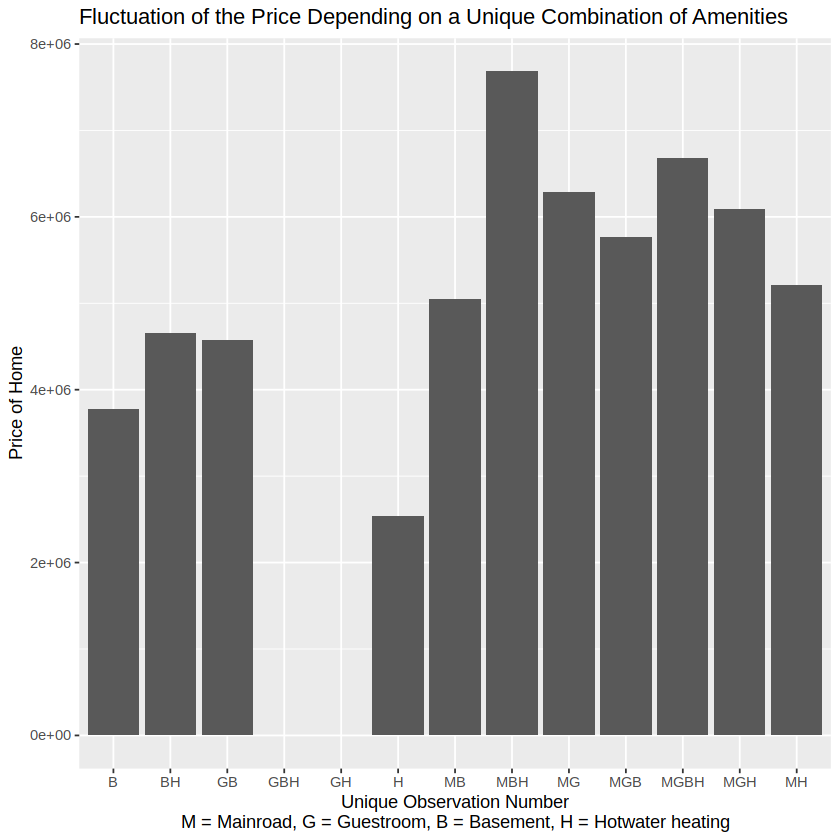

In [211]:
values <- c("yes", "no")
combinations <- expand.grid(
    Var1 = values,
    Var2 = values,
    Var3 = values,
    Var5 = values,
    Var6 = values
)

mean_price_list <- vector()
combo_name_list <- vector()
column_names <- c("combo_type", "price")
avg_price_amenities <- data.frame(matrix(ncol = length(column_names)))

for (i in seq_along(housing_df)) {
    
    combination_price <- housing_df |>
        filter(mainroad == combinations[i, 1] & guestroom == combinations[i, 2] & basement == combinations[i, 3] & hotwaterheating == combinations[i, 4]) |>
        summarize(amount = mean(price, na.rm = TRUE))
    
    mean_price <- as.double(combination_price$amount)
    combo_name <- ""
    
    if (combinations[i, 1] == "yes") {
    combo_name <- paste0(combo_name, "M")
    } 
    if (combinations[i, 2] == "yes") {
    combo_name <- paste0(combo_name, "G")
    } 
    if (combinations[i, 3] == "yes") {
    combo_name <- paste0(combo_name, "B")
    } 
    if (combinations[i, 4] == "yes") {
    combo_name <- paste0(combo_name, "H")
    } 
    if (new_string == "") {
    combo_name <- "None"
    }

    mean_price_list = c(mean_price_list, mean_price)
    combo_name_list = c(combo_name_list, combo_name)
}

mean_price_list
combo_name_list

avg_price_amenities <- data.frame(
    price = mean_price_list,
    combo_type = combo_name_list)

bar_graph <- avg_price_amenities |>
    ggplot(aes(x = combo_type, y = price)) +
        geom_bar(stat = "identity") +
        labs(title = "Fluctuation of the Price Depending on a Unique Combination of Amenities", y = "Price of Home", x = "Unique Observation Number\nM = Mainroad, G = Guestroom, B = Basement, H = Hot water heating")
bar_graph

### Code Explaination
We generate all the possible combinations of amenities a home can have

In [168]:
slice(combinations, 1:3) # There are 16 total combinations in total.  Sliced to save space

Var1,Var2,Var3,Var5,Var6
<fct>,<fct>,<fct>,<fct>,<fct>
yes,yes,yes,yes,yes
no,yes,yes,yes,yes
yes,no,yes,yes,yes


After which we get the mean price of all houses with a certain unique amenities combination.  These are then put into lists which will make up the columns of the data set.
### Patterns
We can see that there is obviously a correlation between the amount of amenities a house has and the ultimate price of it.  Interestingly enough, however, we can see that this isn't always the case, with the mean price of homes with all amenities being cheaper than those with access to the main road, have a basement, and hot water heating.  This is likely to do with other factors such as the total area of the home, as well as its furnishing status among other things.  With the data we have now, there is a possibility that the amount of amenities and the size of the home and/or its furnishing status is related, however, we will need to explore this more deeply later on.